In [8]:
import yfinance as yf
import numpy as np
import pandas as pd
import statsmodels.api as sm
import plotly.graph_objects as go

# Define stock tickers
magnificent_7_minus_tsla = ["AAPL", "MSFT", "NVDA", "GOOGL", "AMZN", "META"]
utility_stocks = ["NEE", "DUK", "SO", "AEP", "EXC", "XEL"]
spy_ticker = "SPY"

# Fetch historical data for the last 150 trading days (buffer for beta calculation)
start_date = "2021-01-01"
end_date = "2025-01-01"
all_stocks = magnificent_7_minus_tsla + utility_stocks + [spy_ticker]

data = yf.download(all_stocks, start=start_date, end=end_date)['Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Create equally weighted portfolio returns
mag7_minus_tsla_returns = returns[magnificent_7_minus_tsla].mean(axis=1)
utility_returns = returns[utility_stocks].mean(axis=1)

# Get SPY returns
spy_returns = returns[spy_ticker]

# Helper function to calculate beta
def estimate_beta(portfolio_returns, market_returns):
    X = sm.add_constant(market_returns)
    model = sm.OLS(portfolio_returns, X).fit()
    return model.params[1]  # beta coefficient

# Estimate beta for the previous 120 days for both portfolios
lookback = 120
mag7_beta = estimate_beta(mag7_minus_tsla_returns[-lookback:], spy_returns[-lookback:])
utility_beta = estimate_beta(utility_returns[-lookback:], spy_returns[-lookback:])

print(f"Estimated Beta for Magnificent 7 minus Tesla: {mag7_beta:.4f}")
print(f"Estimated Beta for Utility Portfolio: {utility_beta:.4f}")

# Hedge ratios for both portfolios
portfolio_value = 100000  # Example portfolio value
mag7_hedge_ratio = -mag7_beta * portfolio_value
utility_hedge_ratio = -utility_beta * portfolio_value

print(f"Hedge Ratio for Magnificent 7 Portfolio: ${mag7_hedge_ratio:.2f}")
print(f"Hedge Ratio for Utility Portfolio: ${utility_hedge_ratio:.2f}")

# Calculate hedge-adjusted returns
hedge_adjusted_mag7_returns = mag7_minus_tsla_returns - mag7_beta * spy_returns
hedge_adjusted_utility_returns = utility_returns - utility_beta * spy_returns

# Aggregate hedge-adjusted returns
cumulative_hedged_mag7 = hedge_adjusted_mag7_returns.cumsum()
cumulative_hedged_utility = hedge_adjusted_utility_returns.cumsum()

print("\nCumulative Hedged Returns:")
print("Magnificent 7 minus Tesla Portfolio:")
print(cumulative_hedged_mag7.tail())
print("\nUtility Portfolio:")
print(cumulative_hedged_utility.tail())

[*********************100%***********************]  13 of 13 completed

Estimated Beta for Magnificent 7 minus Tesla: 1.4094
Estimated Beta for Utility Portfolio: -0.0427
Hedge Ratio for Magnificent 7 Portfolio: $-140935.20
Hedge Ratio for Utility Portfolio: $4270.43

Cumulative Hedged Returns:
Magnificent 7 minus Tesla Portfolio:
Date
2024-12-24    0.403407
2024-12-26    0.399940
2024-12-27    0.400387
2024-12-30    0.407116
2024-12-31    0.401137
dtype: float64

Utility Portfolio:
Date
2024-12-24    0.405432
2024-12-26    0.401606
2024-12-27    0.401835
2024-12-30    0.396781
2024-12-31    0.396567
dtype: float64



/var/folders/__/wgnmk9j14kl1krf80l2c6bfw0000gn/T/ipykernel_41522/1299583575.py:33: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/__/wgnmk9j14kl1krf80l2c6bfw0000gn/T/ipykernel_41522/1299583575.py:33: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [13]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x = cumulative_hedged_mag7.index,
        y = cumulative_hedged_mag7.values,
        name = 'mag7-tesla hedged'
    )
)

fig.add_trace(
    go.Scatter(
        x = cumulative_hedged_utility.index,
        y = cumulative_hedged_utility.values,
        name = 'utilities hedged'
    )
)

fig.add_trace(
    go.Scatter(
        x = utility_returns.index,
        y = utility_returns.cumsum().values,
        name = 'utilities unhedged'
    )
)

fig.add_trace(
    go.Scatter(
        x = mag7_minus_tsla_returns.index,
        y = mag7_minus_tsla_returns.cumsum().values,
        name = 'mag7-tesla unhedged'
    )
)

fig.update_layout(title = 'Hedged vs Unhedged Portfolios againt SP500')
fig.update_yaxes(title = 'simple returns')
fig.show()

[*********************100%***********************]  13 of 13 completed
/var/folders/__/wgnmk9j14kl1krf80l2c6bfw0000gn/T/ipykernel_41522/538421120.py:36: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/__/wgnmk9j14kl1krf80l2c6bfw0000gn/T/ipykernel_41522/538421120.py:36: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/__/wgnmk9j14kl1krf80l2c6bfw0000gn/T/ipykernel_41522/538421120.py:36: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, us

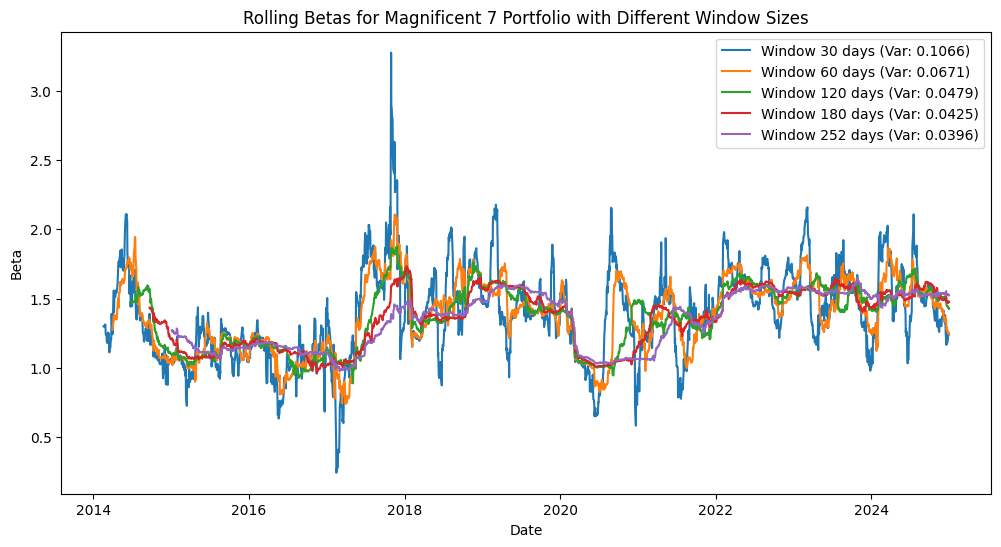

Beta Variance by Window Size:
Window 30 days: Variance = 0.1066
Window 60 days: Variance = 0.0671
Window 120 days: Variance = 0.0479
Window 180 days: Variance = 0.0425
Window 252 days: Variance = 0.0396


In [19]:
import yfinance as yf
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define stock tickers
magnificent_7_minus_tsla = ["AAPL", "MSFT", "NVDA", "GOOGL", "AMZN", "META"]
utility_stocks = ["NEE", "DUK", "SO", "AEP", "EXC", "XEL"]
spy_ticker = "SPY"

# Fetch historical data for the last 150 trading days (buffer for beta calculation)
start_date = "2014-01-01"
end_date = "2025-01-01"
all_stocks = magnificent_7_minus_tsla + utility_stocks + [spy_ticker]

data = yf.download(all_stocks, start=start_date, end=end_date)['Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Create equally weighted portfolio returns
mag7_minus_tsla_returns = returns[magnificent_7_minus_tsla].mean(axis=1)
utility_returns = returns[utility_stocks].mean(axis=1)

# Get SPY returns
spy_returns = returns[spy_ticker]

# Helper function to calculate rolling beta
def rolling_beta(portfolio_returns, market_returns, window):
    betas = []
    for i in range(window, len(portfolio_returns)):
        X = sm.add_constant(market_returns[i - window:i])
        y = portfolio_returns[i - window:i]
        model = sm.OLS(y, X).fit()
        betas.append(model.params[1])
    return pd.Series(betas, index=portfolio_returns.index[window:])

# Define window sizes
window_sizes = [30,60,120,180,252]

# Calculate rolling betas and their variances
beta_variances = {}
plt.figure(figsize=(12, 6))

for window in window_sizes:
    mag7_beta_series = rolling_beta(mag7_minus_tsla_returns, spy_returns, window)
    variance = np.var(mag7_beta_series)
    beta_variances[window] = variance
    
    # Plot rolling beta
    plt.plot(mag7_beta_series, label=f"Window {window} days (Var: {variance:.4f})")

plt.title("Rolling Betas for Magnificent 7 Portfolio with Different Window Sizes")
plt.xlabel("Date")
plt.ylabel("Beta")
plt.legend()
plt.show()

# Display variance results
print("Beta Variance by Window Size:")
for window, variance in beta_variances.items():
    print(f"Window {window} days: Variance = {variance:.4f}")